# Custom Convnets
Design your own convnet.

## 🚀 Introduction
Convolutional neural networks (**convnets**) gradually extract **features** from an image:
- **Early layers**: simple features (lines, contrasts).
- **Deeper layers**: complex features (shapes, objects).

➡️ This is achieved by stacking **convolutional blocks** made of `Conv2D`, `ReLU`, and `MaxPooling2D`.

---

## 🛠️ Example: Creating a ConvNet

### 1️⃣ Load the Data

```python
# Example output:
Found 5117 files belonging to 2 classes.
Found 5051 files belonging to 2 classes.
```

---

### 2️⃣ Define the Model
<iframe src="https://www.kaggle.com/embed/ryanholbrook/custom-convnets?cellIds=3&kernelSessionId=126572665" height="300" style="margin: 0 auto; width: 100%; max-width: 950px;" frameborder="0" scrolling="auto" title="Custom Convnets"></iframe>
**Architecture:**
- 3 **convolutional blocks** followed by a **dense head**.

```python
from tensorflow import keras
from tensorflow.keras import layers

# 🔨 Define the model
model = keras.Sequential([

    # Block 1️⃣
    layers.Conv2D(filters=32, kernel_size=5, activation="relu", padding='same', input_shape=[128, 128, 3]),
    layers.MaxPool2D(),

    # Block 2️⃣
    layers.Conv2D(filters=64, kernel_size=3, activation="relu", padding='same'),
    layers.MaxPool2D(),

    # Block 3️⃣
    layers.Conv2D(filters=128, kernel_size=3, activation="relu", padding='same'),
    layers.MaxPool2D(),

    # 🧠 Dense Head
    layers.Flatten(),
    layers.Dense(units=6, activation="relu"),
    layers.Dense(units=1, activation="sigmoid"),
])


```

---

### 3️⃣ Train the Model

```python
import tensorflow as tf

# ⚙️ Compile the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(epsilon=0.01),
    loss='binary_crossentropy',
    metrics=['binary_accuracy']
)

# 🚀 Train the model
history = model.fit(
    ds_train,
    validation_data=ds_valid,
    epochs=40,
    verbose=0,
)
```

---

### 📈 Plot the Learning Curves

```python
import pandas as pd

# 📊 Training history
history_frame = pd.DataFrame(history.history)

# Plot loss curves
history_frame.loc[:, ['loss', 'val_loss']].plot()

# Plot accuracy curves
history_frame.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot()
```

---

## 🏁 Conclusion

In this project, we built a **custom convnet** with multiple **convolutional blocks** capable of extracting complex features from images.  
🔎 The **deeper** the network, the better it can learn subtle and detailed information from the data!


In [2]:
# Imports
import os, warnings
import matplotlib.pyplot as plt
from matplotlib import gridspec

import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory

# Reproducability
def set_seed(seed=31415):
    np.random.seed(seed)
    tf.random.set_seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    os.environ['TF_DETERMINISTIC_OPS'] = '1'
set_seed()

# Set Matplotlib defaults
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)
plt.rc('image', cmap='magma')
warnings.filterwarnings("ignore") # to clean up output cells


# Load training and validation sets
ds_train_ = image_dataset_from_directory(
    'c:/Users/samad/OneDrive/Dokumenty/526546846848/Computer_Vision/car-or-truck/versions/1/train',
    labels='inferred',
    label_mode='binary',
    image_size=[128, 128],
    interpolation='nearest',
    batch_size=64,
    shuffle=True,
)
ds_valid_ = image_dataset_from_directory(
    'c:/Users/samad/OneDrive/Dokumenty/526546846848/Computer_Vision/car-or-truck/versions/1/valid',
    labels='inferred',
    label_mode='binary',
    image_size=[128, 128],
    interpolation='nearest',
    batch_size=64,
    shuffle=False,
)

# Data Pipeline
def convert_to_float(image, label):
    image = tf.image.convert_image_dtype(image, dtype=tf.float32)
    return image, label

AUTOTUNE = tf.data.experimental.AUTOTUNE
ds_train = (
    ds_train_
    .map(convert_to_float)
    .cache()
    .prefetch(buffer_size=AUTOTUNE)
)
ds_valid = (
    ds_valid_
    .map(convert_to_float)
    .cache()
    .prefetch(buffer_size=AUTOTUNE)
)

Found 5117 files belonging to 2 classes.
Found 5051 files belonging to 2 classes.


# Design a Convnet #

Let's design a convolutional network with a block architecture like we saw in the tutorial. The model from the example had three blocks, each with a single convolutional layer. Its performance on the "Car or Truck" problem was okay, but far from what the pretrained VGG16 could achieve. It might be that our simple network lacks the ability to extract sufficiently complex features. We could try improving the model either by adding more blocks or by adding convolutions to the blocks we have.

Let's go with the second approach. We'll keep the three block structure, but increase the number of `Conv2D` layer in the second block to two, and in the third block to three.

<figure>
<!-- <img src="./images/2-convmodel-2.png" width="250" alt="Diagram of a convolutional model."> -->
<img src="https://storage.googleapis.com/kaggle-media/learn/images/Vko6nCK.png" width="250" alt="Diagram of a convolutional model.">
</figure>

# 1) Define Model #

In [3]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    # Block One
    layers.Conv2D(filters=32, kernel_size=3, activation='relu', padding='same',
                  input_shape=[128, 128, 3]),
    layers.MaxPool2D(),

    # Block Two
    layers.Conv2D(filters=64, kernel_size=3, activation='relu', padding='same'),
    layers.MaxPool2D(),

    # Block Three
    layers.Conv2D(filters=128, kernel_size=3, activation='relu', padding='same'),
    layers.Conv2D(filters=128, kernel_size=3, activation='relu', padding='same'),
    layers.MaxPool2D(),

    # Head
    layers.Flatten(),
    layers.Dense(6, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(1, activation='sigmoid'),
])


# 2) Compile #

To prepare for training, compile the model with an appropriate loss and accuracy metric for the "Car or Truck" dataset.

In [4]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(epsilon=0.01),
    loss='binary_crossentropy',
    metrics=['binary_accuracy']
)


Finally, let's test the performance of this new model. 

In [5]:
history = model.fit(
    ds_train,
    validation_data=ds_valid,
    epochs=50,
)

Epoch 1/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 57s 693ms/step - binary_accuracy: 0.5619 - loss: 0.6842 - val_binary_accuracy: 0.5785 - val_loss: 0.6665
Epoch 2/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 58s 721ms/step - binary_accuracy: 0.5741 - loss: 0.6683 - val_binary_accuracy: 0.5785 - val_loss: 0.6578
Epoch 3/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 63s 794ms/step - binary_accuracy: 0.5751 - loss: 0.6607 - val_binary_accuracy: 0.6228 - val_loss: 0.6524
Epoch 4/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 71s 887ms/step - binary_accuracy: 0.6177 - loss: 0.6575 - val_binary_accuracy: 0.6266 - val_loss: 0.6510
Epoch 5/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 68s 849ms/step - binary_accuracy: 0.6230 - loss: 0.6499 - val_binary_accuracy: 0.6005 - val_loss: 0.6395
Epoch 6/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 73s 914ms/step - binary_accuracy: 0.6207 - loss: 0.6457 - val_binary_accuracy: 0.6343 - val_loss: 0.6336
Epoch 7/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 67s 844ms/step - binary_accuracy: 0.6412 - loss: 0.6392 - val_binary_accuracy: 0.6421 - val_loss: 0.6299

<Axes: >

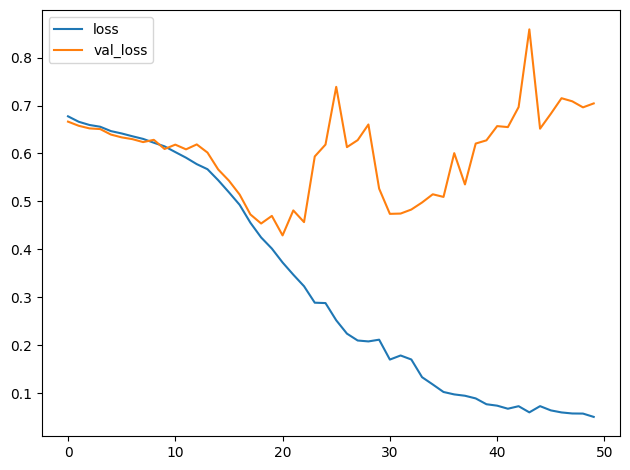

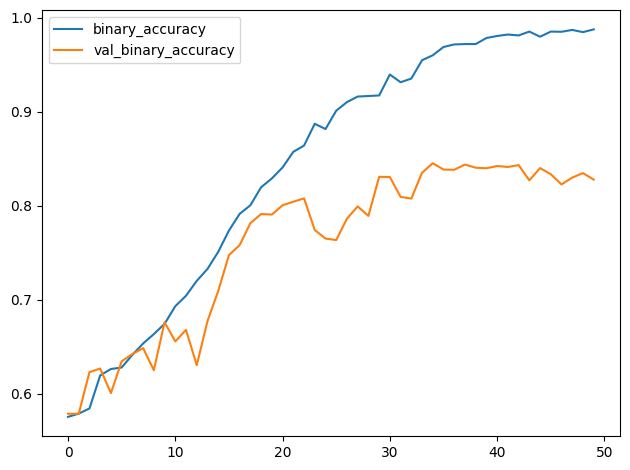

In [6]:
import pandas as pd
history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss', 'val_loss']].plot()
history_frame.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot()